In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Buat DataFrame manual
data = {
    'Luas': [100, 150, 80, 120, 200, 90, 110, 140, 130, 160],
    'Kamar_Tidur': [3, 4, 2, 3, 5, 2, 3, 4, 3, 4],
    'Usia': [5, 2, 10, 7, 1, 8, 6, 3, 4, 2],
    'Harga': [900, 1200, 700, 950, 1600, 750, 880, 1150, 1000, 1300]
}

df = pd.DataFrame(data)

# 2. Pisahkan fitur dan target
X = df[['Luas', 'Kamar_Tidur', 'Usia']]
y = df['Harga']



In [2]:

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Buat model dan latih
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [3]:

# 5. Prediksi
y_pred = model.predict(X_test)


In [4]:

# 6. Evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Evaluasi Model ===")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print()
print("=== Koefisien Model ===")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Koefisien: {list(zip(X.columns, model.coef_))}")



=== Evaluasi Model ===
MSE: 3083.43
R² Score: 0.69

=== Koefisien Model ===
Intercept: 239.81
Koefisien: [('Luas', np.float64(6.3009478672985795)), ('Kamar_Tidur', np.float64(18.43601895734601)), ('Usia', np.float64(-11.161137440758283))]


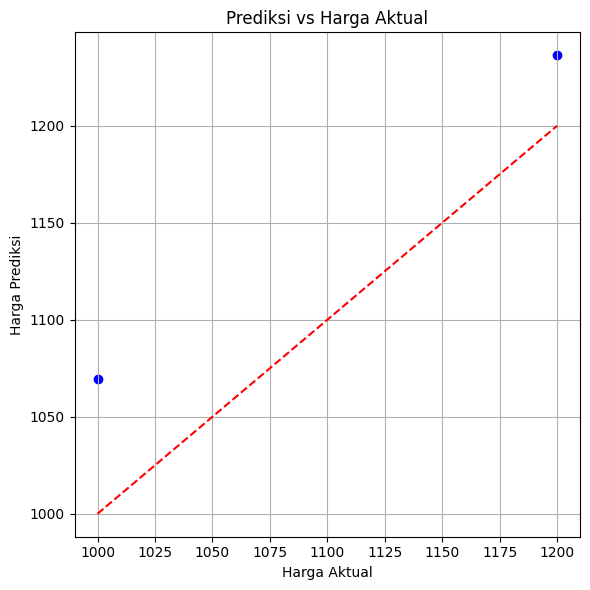

In [5]:
# 7. Scatter plot Prediksi vs Aktual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Prediksi vs Harga Aktual")
plt.grid(True)
plt.tight_layout()
plt.show()



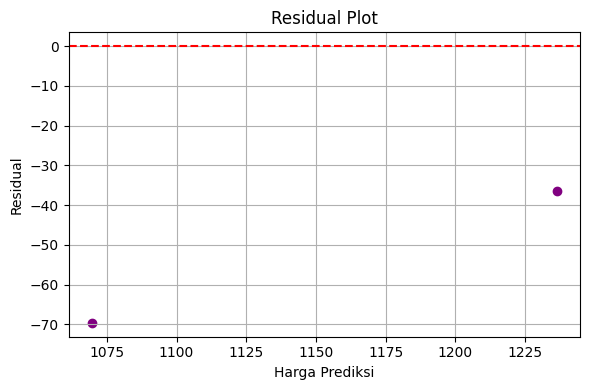

In [6]:
# 8. Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Harga Prediksi")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()